In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X,y = make_blobs(random_state = 42, cluster_std=2)
print("Num data: ", len(X))
print("Example data: \n{}".format(X[:3]))

Num data:  100
Example data: 
[[-8.57321463 -9.90980404]
 [ 6.26691327 -0.48855895]
 [-3.44814639 10.09940622]]


In [17]:
from annoy import AnnoyIndex
import random

f = 2 # Num features
t = AnnoyIndex(f, 'euclidean')  # Length of item vector that will be indexed
for i in range(99):
    t.add_item(i, X[i])

t.build(10) # 10 trees
t.save('test.ann')

In [14]:
u = AnnoyIndex(f, 'euclidean')
u.load('test.ann') # super fast, will just mmap the file
v = X[99]
n = 10
neigbors = u.get_nns_by_vector(v, n, search_k=-1, include_distances=False)
neigbors

[35, 41, 20, 10, 56, 43, 44, 9, 88, 59]

(-11, 15)

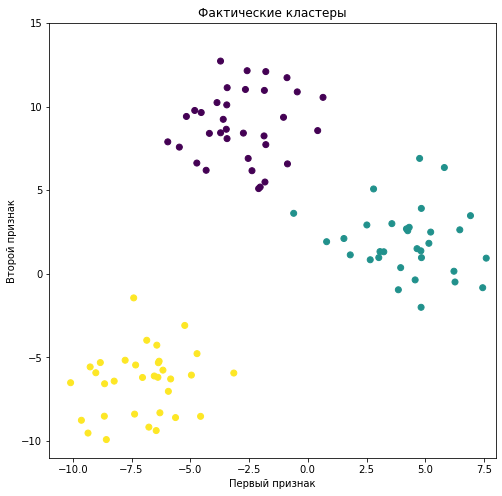

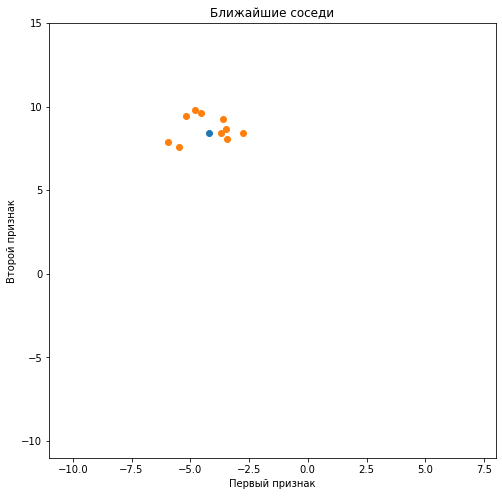

In [18]:
plt.figure(figsize=(8,8))
plt.title("Фактические кластеры")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
plt.xlim(-11,8)
plt.ylim(-11,15)

plt.figure(figsize=(8,8))
plt.title("Ближайшие соседи")
plt.scatter(v[0], v[1])
plt.scatter(X[neigbors][:,0], X[neigbors][:,1])
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
plt.xlim(-11,8)
plt.ylim(-11,15)